# Workflow: An example

files needed = None

In this notebook I am going to take you through a real-world example. I was asked to prepare some background data for a [UW Now broadcast](https://www.uwalumni.com/news/uw-now-culver-ruhl-stulman-suemnicht/) on the restaurant industry during covid. 

The goal is to illustrate, from beginning to end, taking an idea to a presentation. For brevity, I will focus here on some of the  time-series figures    

## 1. Pose a preliminary question(s)

How did restaurants (ahem) *fare* during the pandemic? 

Some of my initial thoughts: I want to look at measures of sales and employment; maybe business start up and closure? Can I find data on Wisconsin? I should compare the restaurant industry to national averages or maybe other sectors. 

## 2. Find the appropriate data

Sales and employment data are from the BLS, accessed through the FRED database. Some is at the national level, some at the Wisconsin level.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas_datareader as pdr

In [11]:
bls = pdr.get_data_fred(['CES7072200001', 'USPRIV', 'RSFSDP', 'RSGCS', 'WINA'], start='2016-01-01', end='2021-01-01')

# Industry 70722 is "Food Services and Drinking Places" 
bls.columns = ['emp_70722', 'emp_all', 'sales_70722', 'sales_grocery', 'emp_all_wi']

## 3. Get the data into a usable form 

Not much to do here yet. The FRED data are pretty clean. Let's check on a few things. 

In [12]:
print(bls.head(2), '\n')
print(bls.columns)
print(bls.dtypes)
print(bls.index)

            emp_70722  emp_all  sales_70722  sales_grocery  emp_all_wi
DATE                                                                  
2016-01-01    11318.6   121091        53045          51655      2917.1
2016-02-01    11337.1   121279        54237          51530      2922.0 

Index(['emp_70722', 'emp_all', 'sales_70722', 'sales_grocery', 'emp_all_wi'], dtype='object')
emp_70722        float64
emp_all            int64
sales_70722        int64
sales_grocery      int64
emp_all_wi       float64
dtype: object
DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01'

The data types look good; I expected them all to be numeric. The data are monthly, and start in 2016. The last observation is January 2021.

## 4. Preliminary analysis

Let's make some figures. These will be ugly, because they are just for me to get look through. These would not be included in my final output or in [my code](https://github.com/ruhl0029/covid-restaurants) that I post that backs-up my final output. 

I made a lot more figures than these, but I hope this gives you some idea of the "casting about" that typically happens at the beginning of a project. 

People are generally not interested in how you found the answer. They are generally interested in understanding the answer. 

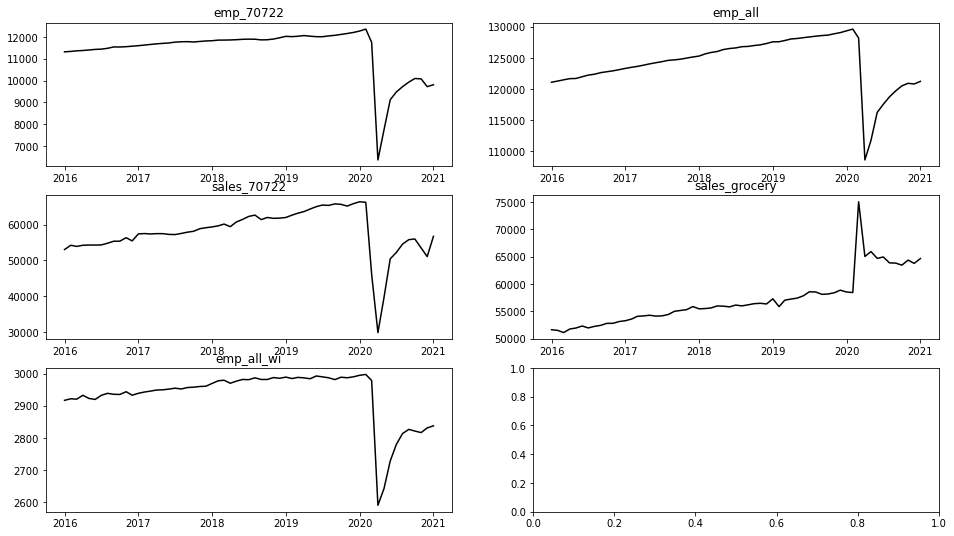

In [13]:
fig, ax = plt.subplots(3,2, figsize=(16,9))

for a, c in zip(fig.axes, bls.columns):
    a.plot(bls.index, bls[c], color='black')
    a.set_title(c)

Okay, so employment has the same general shape in the national data for all firms, the Wisconsin data for all firms, and the national data for restaurants. **I need to find a way to compare them.**

Grocery sales growth actually increases and spikes at the beginning of the pandemic. This is everyone running out to stock-up on supplies. Sales in restaurants looks a lot like employment. No surprise there. 

### How did WI compare to the nation?

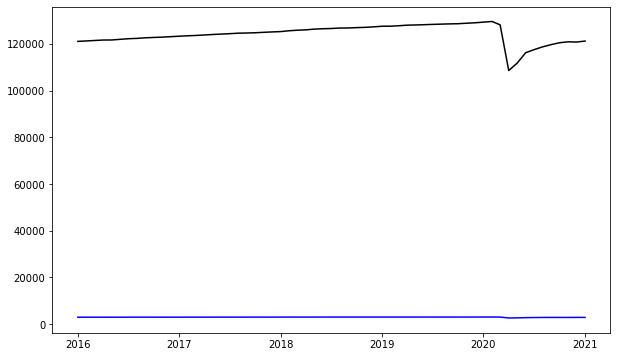

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(bls.index, bls['emp_all_wi'], color='blue')
ax.plot(bls.index, bls['emp_all'], color='black')

plt.show()

Hmmmmm, that is not very useful. Let's go back to step 3 and transform these variables. 

The data are monthly, so, below, I'm computing the year-over-year growth rates. This takes care of any month-specific issues. For example, people may dine out more during December for the holidays.  

In [15]:
bls_yy= bls.pct_change(12)*100

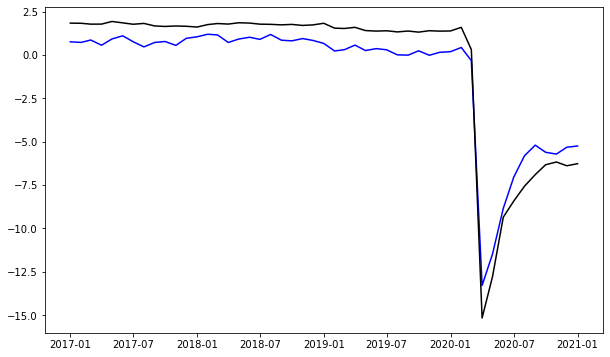

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(bls_yy.index, bls_yy['emp_all_wi'], color='blue')
ax.plot(bls_yy.index, bls_yy['emp_all'], color='black')

plt.show()

The growth rate figure is much easier to read. I see that the covid period was very similar in WI and the nation, so I will focus on the national data. 

Now let's compare restaurants to all industries.  

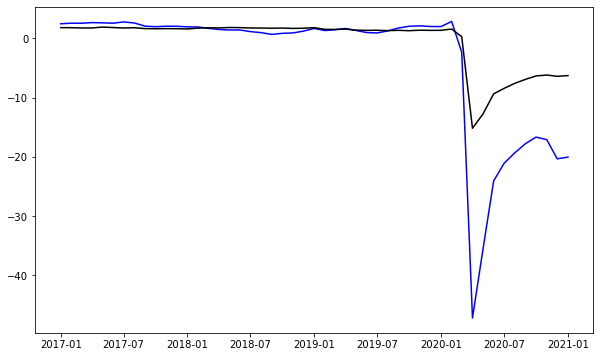

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(bls_yy.index, bls_yy['emp_70722'], color='blue')
ax.plot(bls_yy.index, bls_yy['emp_all'], color='black')

plt.show()

Okay, restaurants did much worse than the private sector in total. This is a good (partial) answer to my question. 

Now let's look at sales.

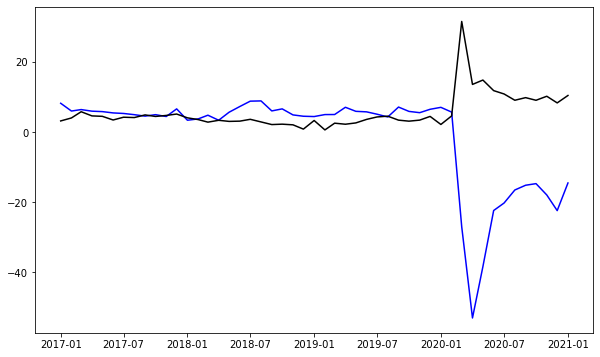

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(bls_yy.index, bls_yy['sales_70722'], color='blue')
ax.plot(bls_yy.index, bls_yy['sales_grocery'], color='black')

plt.show()

Yeah, this figure tells the big story. Restaurant meals and meals at home are pretty close substitutes. People bought more groceries and spent less time eating in restaurants.  

**Even though this is the fifth figure I made, this is the first figure I want to show. This is the one that drives the story.**

I want to dig a bit deeper on the employment data. Let's grab the JOLTs data. Also from FRED.

In [21]:
jolts = pdr.get_data_fred(['JTS7200JOR', 'JTS7200HIR', 'JTU7200LDR', 'JTS7200QUR', 'JTS7200TSR', 'JTSHIR', 'JTSTSR'], 
                         start='2016-01-01', end='2021-01-01')
jolts.columns = ['opens', 'hires', 'layoffs', 'quits', 'sep', 'hires_all', 'sep_all']

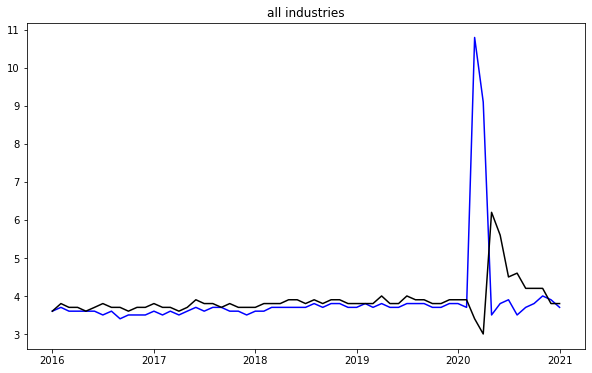

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(jolts.index, jolts['sep_all'], color='blue')
ax.plot(jolts.index, jolts['hires_all'], color='black')
ax.set_title('all industries')
plt.show()

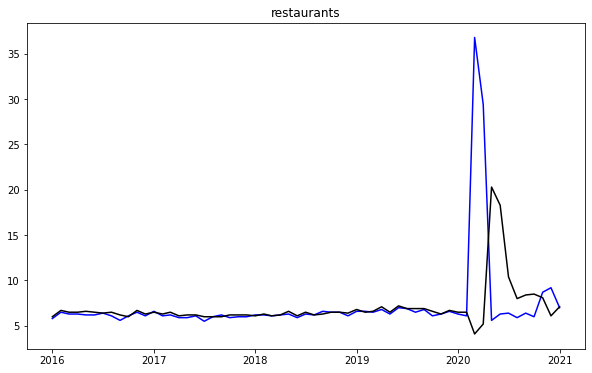

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(jolts.index, jolts['sep'], color='blue')
ax.plot(jolts.index, jolts['hires'], color='black')
ax.set_title('restaurants')
plt.show()

I see a big spike in the separation rate (the number of people who lost a job / number employed) followed by a bit of a hiring spike as some of them are rehired. The spike is **much larger** in the restaurant data. 

## 5. Revisit and revise your question(s)

Time to collect my findings: 

1. Covid leads to a shift away from spending on restaurants towards groceries. 
2. This leads to a large decrease in employment in the restaurant industry (compared to the whole economy)
3. Almost 35 percent of restaurant workers separated from jobs in March (April?) 2020
4. Separations are increasing again at the end of 2020

## 6. Final analysis

In this case, I'm pretty much finished. 

I would like to add something about business closures and openings, but I did not. This notebook is already getting pretty long.  If I push this project further, that is the first thing I will do. 

## 7. Report your findings

Now it is time to choose which figures I want to use and how I want to make them look. 


1. **Message:** The restaurant industry has suffered much more than the total economy. 
2. **Audience:** My audience is UW alums from all backgrounds. This will not be a technical presentation. 
3. **Medium:** I'm presenting to people watching on a computer or maybe a mobile device. I can use color, but I should keep the visualizations sparse. Some of the screens may be small. 


### Some notes on the figures

* The group sent me a slide template. It is a 16x9 perspective, but I'm going with 16x10 since I will include the titles in my figures. 
* The template uses a color red that I can match with the 'firebrick' color.
* I'm making the labels with large fonts so they show up on small screens. 
* I'm saving the figures as svg files so that they will look good when someone zooms in.

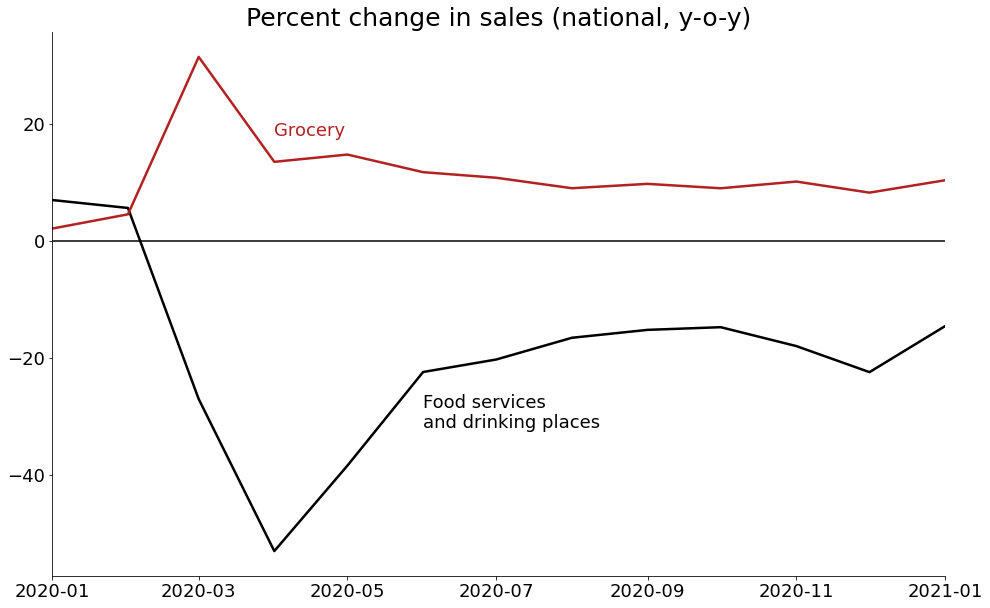

In [24]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(bls_yy.index, bls_yy['sales_70722'], color='black', lw=2.5)
ax.plot(bls_yy.index, bls_yy['sales_grocery'], color='firebrick',lw=2.5)
ax.axhline(0, color='black')
ax.tick_params(axis='both', labelsize=18 )
ax.set_xlim(dt.datetime(2020,1,1), dt.datetime(2021,1,1))


ax.text(dt.datetime(2020,4,1), 18, 'Grocery', fontsize=18, color='firebrick')
ax.text(dt.datetime(2020,6,1), -32, 'Food services \nand drinking places', fontsize=18)

ax.set_title('Percent change in sales (national, y-o-y)', fontsize=25)

sns.despine()

plt.savefig('nat_sales.svg', bbox_inches='tight')

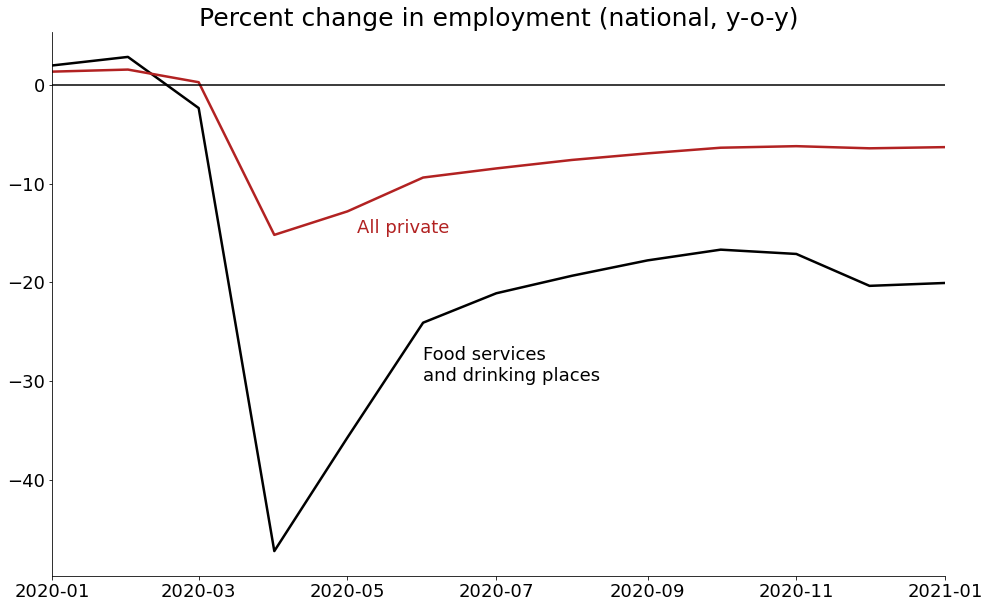

In [25]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(bls_yy.index, bls_yy['emp_70722'], color='black', lw=2.5)
ax.plot(bls_yy.index, bls_yy['emp_all'], color='firebrick',lw=2.5)
ax.axhline(0, color='black')
ax.tick_params(axis='both', labelsize=18 )
ax.set_xlim(dt.datetime(2020,1,1), dt.datetime(2021,1,1))


ax.text(dt.datetime(2020,5,5), -15, 'All private', fontsize=18, color='firebrick')
ax.text(dt.datetime(2020,6,1), -30, 'Food services \nand drinking places', fontsize=18)

ax.set_title('Percent change in employment (national, y-o-y)', fontsize=25)

sns.despine()

plt.savefig('nat_emp.svg', bbox_inches='tight')

### More notes

* Putting all four lines on one axes would have looked very cluttered, so I'm putting them on side-by-side subplots. 
* The shorter x axes mean I need to finesse the tick labels
* I'm not putting tick labels on the right-side y axis to remove some clutter


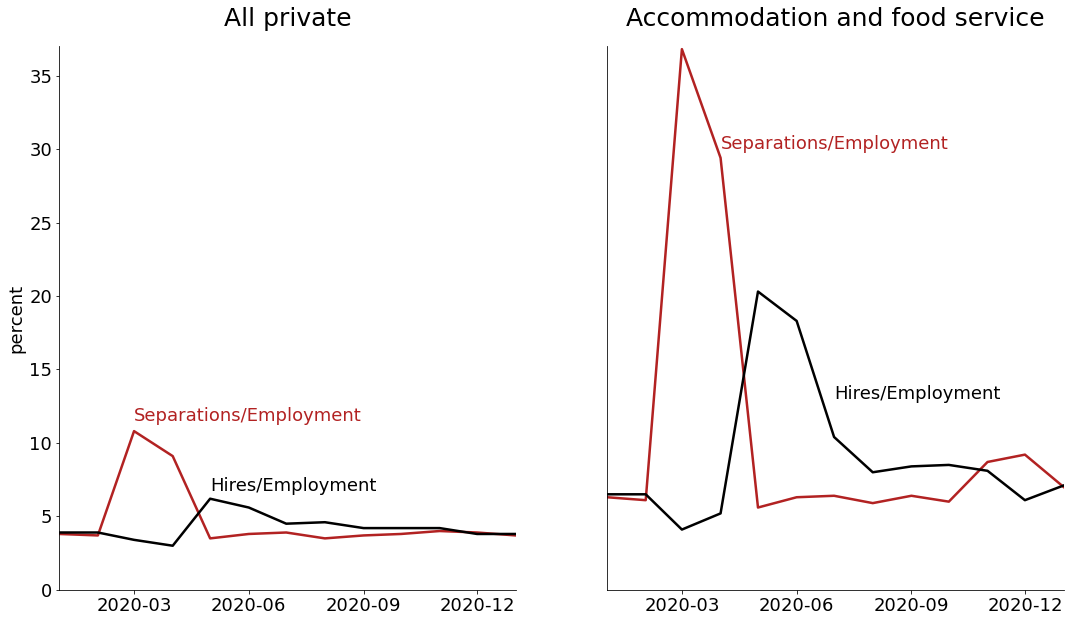

In [29]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates

years_fmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots(1,2, figsize=(18,10))

ax[0].plot(jolts.index, jolts['sep_all'], color='firebrick', lw=2.5)
ax[0].plot(jolts.index, jolts['hires_all'], color='black', lw=2.5)

ax[1].plot(jolts.index, jolts['sep'], color='firebrick', lw=2.5)
ax[1].plot(jolts.index, jolts['hires'], color='black', lw=2.5)

ax[0].set_title('All private', fontsize=25, pad=20)
ax[1].set_title('Accommodation and food service', fontsize=25, pad=20)

for a in ax:
    a.set_xlim(dt.datetime(2020,1,1), dt.datetime(2021,1,1))
    a.set_ylim(0,37)
    sns.despine(ax=a)
    a.tick_params(axis='both', labelsize=18 )
    a.xaxis.set_major_formatter(years_fmt)
    a.set_xticks([dt.datetime(2020,3,1), dt.datetime(2020,6,1), dt.datetime(2020,9,1), dt.datetime(2020,12,1)])
    
ax[1].tick_params(axis='y', left=False, labelleft=False)
ax[0].set_ylabel('percent', fontsize=18)

ax[0].text(dt.datetime(2020,3,1), 11.5, 'Separations/Employment', fontsize=18, color='firebrick')
ax[0].text(dt.datetime(2020,5,1), 6.75, 'Hires/Employment', fontsize=18, color='black')
ax[1].text(dt.datetime(2020,4,1), 30, 'Separations/Employment', fontsize=18, color='firebrick')
ax[1].text(dt.datetime(2020,7,1), 13, 'Hires/Employment', fontsize=18, color='black')

plt.savefig('jolts_compare.svg', bbox_inches='tight')
plt.show()

I am now ready to insert these svg files into the slide template that I was given. I have posted the finished version of my slides on my [github](https://github.com/ruhl0029/covid-restaurants). They use more figures than just the ones created in this notebook. 

The github repo also has my code that created the figures ([bls_figures.ipynb](https://github.com/ruhl0029/covid-restaurants/blob/main/bls_figures.ipynb)). Notice that they do not include all of the intermediate figures that are in this notebook. I only submit the code that gets used. This is the same way you should "prune" your final project code before submitting it. 